# Class 8: Visualization and Starting to Clean Data

## Announcements

1. closing notebooks

    - recall that they don't stop when you close the tabs
    - you need to stop it at the terminal it launched from
    - with: ctr + c as it says when you first [launch a notebook](https://jupyter.readthedocs.io/en/latest/running.html#starting-the-notebook-server)

1. restart and rerun notebooks

    - notebooks are a continuous REPL as long as you have it open
    - if you change code, you could have, for example a variable that is no longer defined in the notebook as written, but that still exists in memory, so code that depends on it will still run, for now, but not after you restart next (eg if we run it while grading)
    - to check, [restart and rerun](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Running%20Code.html#Restarting-the-kernels) your notebook

1. say hello on zoom for attendance

## Setup

First we `import` packages and load data as normal.

In [1]:
import pandas as pd
import seaborn as sns

data_url = 'https://raw.githubusercontent.com/brownsarahm/python-socialsci-files/master/data/SAFI_full_shortname.csv'
sns.set(font_scale=1.25)

I've added one new command here, Seaborn's []`set` function](https://seaborn.pydata.org/generated/seaborn.set.html). It sets a bunch of theme aspects for plotting, here I used it to increase the font size.  


## Warmup Activity

How recreate this plot?

![image to copy](https://github.com/rhodyprog4ds/BrownFall20/blob/main/img/class8.png?raw=true)

First, load the data

In [2]:
safi_df = pd.read_csv(data_url)

This is a [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot).

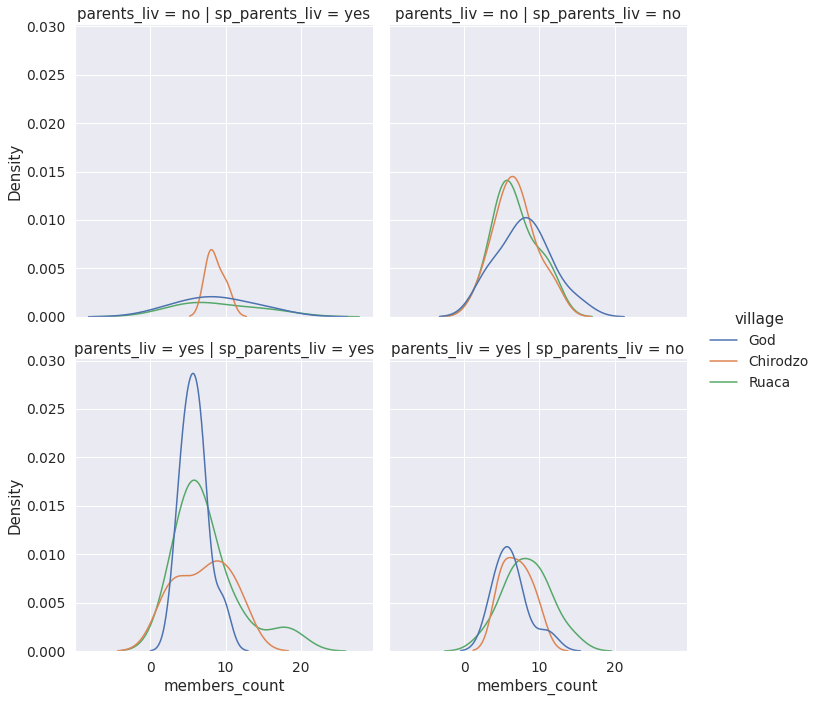

In [3]:
sns.displot(data=safi_df, x='members_count',row='parents_liv',
            col = 'sp_parents_liv',hue='village',kind='kde')

This allows comparisons of how the village, respondent's parents living (`parents_liv`), and the spouse's (`sp_parents_liv`) influence the number of members of the household (`members_count`). The `kind='kde'` parameter uses the underlying [`kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot) to apply [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)

````{margin}
```{tip}
This is a general strategy. Testing out parameters with different values is a valuable way to learn what they do, and to build intuition about what they do.  The documentation also has demos of a lot of values.
```
````

We can understand better what this does, by comparing what happens when we take it out.

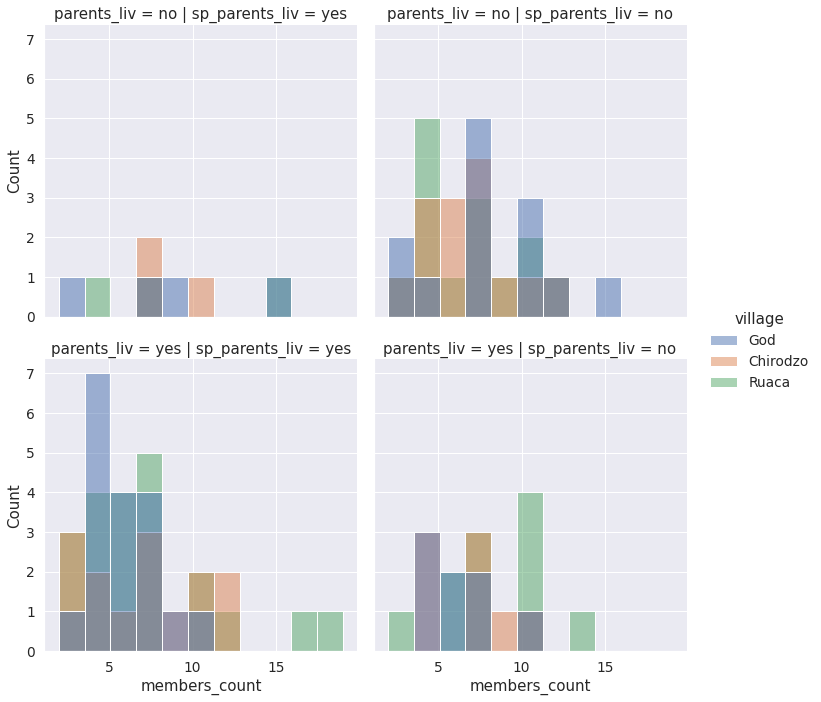

In [4]:
sns.displot(data=safi_df, x='members_count',row='parents_liv',
            col = 'sp_parents_liv',hue='village')

## What about the rest of the columns?

We've used this SAFI dataset a lot, but we've only used a few of the many columns.  Let's look at all of them.

In [5]:
safi_df.columns

Index(['key_id', 'interview_date', 'quest_no', 'start', 'end', 'province',
       'district', 'ward', 'village', 'years_farm', 'agr_assoc', 'note2',
       'no_membrs', 'members_count', 'remittance_money', 'years_liv',
       'parents_liv', 'sp_parents_liv', 'grand_liv', 'sp_grand_liv',
       'respondent_roof_type', 'respondent_wall_type',
       'respondent_wall_type_other', 'respondent_floor_type', 'window_type',
       'buildings_in_compound', 'rooms', 'other_buildings', 'no_plots',
       'plots_count', 'water_use', 'no_group_count', 'yes_group_count',
       'no_enough_water', 'months_no_water', 'period_use', 'exper_other',
       'other_meth', 'res_change', 'memb_assoc', 'resp_assoc', 'fees_water',
       'affect_conflicts', 'note', 'need_money', 'money_source',
       'money_source_other', 'crops_contr', 'emply_lab', 'du_labour',
       'liv_owned', 'liv_owned_other', 'liv_count', 'poultry',
       'du_look_aftr_cows', 'items_owned', 'items_owned_other', 'no_meals',
       'mon

We can look at the first few row to recall what sort of data are available in each column.

In [6]:
safi_df.head()

,key_id,interview_date,quest_no,start,end,province,district,ward,village,years_farm,...,items_owned,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID
0,1,17 November 2016,1,2017-03-23T09:49:57.000Z,2017-04-02T17:29:08.000Z,Manica,Manica,Bandula,God,11,...,['bicycle' ; 'television' ; 'solar_panel' ; ...,NaN,2,['Jan'],['na' ; 'rely_less_food' ; 'reduce_meals' ; ...,-19.112259,33.483456,698,14.0,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,2,17 November 2016,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Manica,Manica,Bandula,God,2,...,['cow_cart' ; 'bicycle' ; 'radio' ; 'cow_pl...,NaN,2,['Jan' ; 'Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112477,33.483416,690,19.0,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
2,3,17 November 2016,3,2017-04-02T14:35:26.000Z,2017-04-02T17:26:53.000Z,Manica,Manica,Bandula,God,40,...,['solar_torch'],NaN,2,['Jan' ; 'Feb' ; 'Mar' ; 'Oct' ; 'Nov' ; ...,['na' ; 'restrict_adults' ; 'lab_ex_food'],-19.112108,33.483450,674,13.0,uuid:193d7daf-9582-409b-bf09-027dd36f9007
3,4,17 November 2016,4,2017-04-02T14:55:18.000Z,2017-04-02T17:27:16.000Z,Manica,Manica,Bandula,God,6,...,['bicycle' ; 'radio' ; 'cow_plough' ; 'sola...,NaN,2,['Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112229,33.483424,679,5.0,uuid:148d1105-778a-4755-aa71-281eadd4a973
4,5,17 November 2016,5,2017-04-02T15:10:35.000Z,2017-04-02T17:27:35.000Z,Manica,Manica,Bandula,God,18,...,['motorcyle' ; 'radio' ; 'cow_plough' ; 'mo...,NaN,2,['Aug' ; 'Sept' ; 'Oct' ; 'Nov'],['na' ; 'go_forest' ; 'migrate'],-19.112217,33.483425,689,10.0,uuid:2c867811-9696-4966-9866-f35c3e97d02d


It might be interesting to use the `items_owned` column to compare find out if there are differences between farms based on what items they have.

Maybe we'd want to see how many farms own each item, maybe we want to know how many farms own bicycle. Let's try `value_counts` out like we used before.

In [7]:
safi_df['items_owned'].value_counts()

['mobile_phone']                                                                                                            4
['radio']                                                                                                                   4
['bicycle' ;  'radio' ;  'mobile_phone']                                                                                    3
['bicycle' ;  'radio' ;  'cow_plough' ;  'solar_panel' ;  'table' ;  'mobile_phone']                                        3
['bicycle' ;  'radio' ;  'cow_plough' ;  'solar_panel' ;  'solar_torch' ;  'mobile_phone']                                  3
                                                                                                                           ..
['cow_cart' ;  'bicycle' ;  'radio' ;  'cow_plough' ;  'solar_panel' ;  'solar_torch']                                      1
['cow_cart' ;  'bicycle' ;  'radio' ;  'cow_plough' ;  'solar_torch']                                                 

The problem is this gives the count of each *list* of items instead of each item.  What we'd want instead is one column for each item, where the values in the column are 1 when the farm owns that item and 0 when they don't. This representation is sometimes called 1 hot encoding and other times (including in pandas) it's called dummy variables.


## Using Dummy Variables

Let's try this function out, first on the `village` column.

In [8]:
pd.get_dummies(data= safi_df,columns=['village'])

,key_id,interview_date,quest_no,start,end,province,district,ward,years_farm,agr_assoc,...,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID,village_Chirodzo,village_God,village_Ruaca
0,1,17 November 2016,1,2017-03-23T09:49:57.000Z,2017-04-02T17:29:08.000Z,Manica,Manica,Bandula,11,no,...,['Jan'],['na' ; 'rely_less_food' ; 'reduce_meals' ; ...,-19.112259,33.483456,698,14.0,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef,0,1,0
1,2,17 November 2016,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Manica,Manica,Bandula,2,yes,...,['Jan' ; 'Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112477,33.483416,690,19.0,uuid:099de9c9-3e5e-427b-8452-26250e840d6e,0,1,0
2,3,17 November 2016,3,2017-04-02T14:35:26.000Z,2017-04-02T17:26:53.000Z,Manica,Manica,Bandula,40,no,...,['Jan' ; 'Feb' ; 'Mar' ; 'Oct' ; 'Nov' ; ...,['na' ; 'restrict_adults' ; 'lab_ex_food'],-19.112108,33.483450,674,13.0,uuid:193d7daf-9582-409b-bf09-027dd36f9007,0,1,0
3,4,17 November 2016,4,2017-04-02T14:55:18.000Z,2017-04-02T17:27:16.000Z,Manica,Manica,Bandula,6,no,...,['Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112229,33.483424,679,5.0,uuid:148d1105-778a-4755-aa71-281eadd4a973,0,1,0
4,5,17 November 2016,5,2017-04-02T15:10:35.000Z,2017-04-02T17:27:35.000Z,Manica,Manica,Bandula,18,no,...,['Aug' ; 'Sept' ; 'Oct' ; 'Nov'],['na' ; 'go_forest' ; 'migrate'],-19.112217,33.483425,689,10.0,uuid:2c867811-9696-4966-9866-f35c3e97d02d,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,127,18 May 2017,126,2017-05-18T04:13:37.000Z,2017-05-18T04:35:47.000Z,Manica,Manica,Bandula,5,yes,...,['Oct' ; 'Nov' ; 'Dec'],['rely_less_food' ; 'lab_ex_food'],-19.112194,33.483379,700,7.0,uuid:69caea81-a4e5-4e8d-83cd-9c18d8e8d965,0,0,1
127,128,04 June 2017,193,2017-06-04T09:36:20.000Z,2017-06-04T10:13:32.000Z,Manica,Manica,Bandula,10,no,...,['none'],['na'],-19.112157,33.483390,720,9.0,uuid:5ccc2e5a-ea90-48b5-8542-69400d5334df,0,0,1
128,129,04 June 2017,194,2017-06-04T10:13:36.000Z,2017-06-04T10:32:06.000Z,Manica,Manica,Bandula,5,no,...,['Sept' ; 'Oct' ; 'Nov'],['lab_ex_food'],-19.112271,33.483471,719,10.0,uuid:95c11a30-d44f-40c4-8ea8-ec34fca6bbbf,0,0,1
129,130,04 June 2017,199,2017-06-04T10:33:55.000Z,2017-06-04T10:52:22.000Z,Manica,Manica,Bandula,17,yes,...,['Nov' ; 'Dec'],['rely_less_food' ; 'limit_variety' ; 'reduc...,-19.112278,33.483390,711,5.0,uuid:ffc83162-ff24-4a87-8709-eff17abc0b3b,1,0,0


Instead of scrolling, we can isolate the new columns we just created.

In [9]:
safi_df_villages = pd.get_dummies(data= safi_df,columns=['village'])
keep_cols = [col for col in safi_df_villages.columns if 'village_' in col]
safi_df_villages[keep_cols]

,village_Chirodzo,village_God,village_Ruaca
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
126,0,0,1
127,0,0,1
128,0,0,1
129,1,0,0


Note that now we have 3 columns, one for each village. This column was already usable, but it was well formatted an useful to illustrate what `get_dummies` does.

```{note}
try this out and compare the two, test out `get_dummies` on another column to be sure you know what it does.
```

Now, we can try it on `items_owned`.
_this time we'll filter the columns for display and inspection right away

In [10]:
safi_df_items = pd.get_dummies(data= safi_df,columns=['items_owned'])
keep_cols = [col for col in safi_df_items.columns if 'village_' in col]
safi_df_items[keep_cols]

""
0
1
2
3
4
...
126
127
128
129


This still isn't quite what we want, because each value in the `items_owned` column *looks* like a list but it's actually a string, we can check that with the `type` function.

In [11]:
type(safi_df['items_owned'][0])

str

## Cleaning One Cell of Data

So, let's clean the value from one cell of that column and see what else is going on. First, we save it to a variable.

In [12]:
farm1_items = safi_df['items_owned'][0]

Let's look at it first.

In [13]:
farm1_items

"['bicycle' ;  'television' ;  'solar_panel' ;  'table']"

We could try first casting it to a list.

In [14]:
list(farm1_items)

['[',
 "'",
 'b',
 'i',
 'c',
 'y',
 'c',
 'l',
 'e',
 "'",
 ' ',
 ';',
 ' ',
 ' ',
 "'",
 't',
 'e',
 'l',
 'e',
 'v',
 'i',
 's',
 'i',
 'o',
 'n',
 "'",
 ' ',
 ';',
 ' ',
 ' ',
 "'",
 's',
 'o',
 'l',
 'a',
 'r',
 '_',
 'p',
 'a',
 'n',
 'e',
 'l',
 "'",
 ' ',
 ';',
 ' ',
 ' ',
 "'",
 't',
 'a',
 'b',
 'l',
 'e',
 "'",
 ']']

That doesn't quite do it though, let's try separating it with the split method at the ';'.

In [15]:
farm1_items.split(';')

["['bicycle' ", "  'television' ", "  'solar_panel' ", "  'table']"]

This still has some extra characters, in it though. We should remove those, probably before we do the split so that we don't end up with empty items in the list.

In [16]:
farm1_items.replace('[','').replace(']','').replace("'","")

'bicycle ;  television ;  solar_panel ;  table'

That is now ready to split.

In [17]:
farm1_items.replace('[','').replace(']','').replace("'","").split(';')

['bicycle ', '  television ', '  solar_panel ', '  table']

There are some empty spaces lest.  Python has a string function `strip` that removes leading and trailing (on the ends) whitespace (spaces, tabs, new lines), we have to apply it to each individual item of that list above. We can use a list comprehension for this.

In [18]:
[i.strip() for i in  farm1_items.replace('[','').replace(']','').replace("'","").split(';')]

['bicycle', 'television', 'solar_panel', 'table']

## Applying this to the rest of the data

We can put that in a function so that we can reuse it.

In [19]:
def separate_items(row):
    '''
    clean the items owned column of one row of the safi_df
    '''

    return [i.strip() for i in  row['items_owned'].replace('[','').replace(']','').replace("'","").split(';')]



Pandas provides us special function to apply a function to a dataframe along a given axis.

In [20]:
 safi_df.apply(separate_items,axis=1)

AttributeError: 'float' object has no attribute 'replace'

This error means that there are some elements of that column that is a float instead of a string. We should check what that might be. We can check with a list comprehension and look at the ones that are `float`

In [21]:
[item_list for item_list in safi_df['items_owned'] if type(item_list)==float]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Since the floats are `nan`, we know that our function more or less is the right thing to do, but we need to modify our function to accommodate those values. We can replace them with an empty list.
````{margin}
```{tip}
If this were a regular analysis and not a tutorial, we would probably just edit the cell above, but for the purpose of making this tutorial more readable, we'll copy the function from above, into another cell, edit that cell, and overwrite in python memory by leaving it the same function name.  

If instead we wanted to be able to compare the two functions, we'd give the second one a different name.
```
````

In [22]:
def separate_items(row):
    '''
    '''
    if type(row['items_owned'])==str:
        return [i.strip() for i in  row['items_owned'].replace('[','').replace(']','').replace("'","").split(';')]
    else:
        return []


We can try this again:

In [23]:
safi_df['items_owned_clean'] = safi_df.apply(separate_items,axis=1)

it runs successfully and we can look at the  output.

In [24]:
safi_df[['items_owned_clean']].head()

,items_owned_clean
0,"[bicycle, television, solar_panel, table]"
1,"[cow_cart, bicycle, radio, cow_plough, solar_p..."
2,[solar_torch]
3,"[bicycle, radio, cow_plough, solar_panel, mobi..."
4,"[motorcyle, radio, cow_plough, mobile_phone]"


This looks all good and we'll pick up from here on Monday.